## 1.1 Intro

This is my first ML project. I decided to start with "Titanic - Machine Learning from Disaster" as it seemed an interesting problem for begginer, and sometimes is reffered as "Hello world in Machine Learning". 
Additionaly, there are a lot of resorces to help navigate the project, from very simple ones, to more complex.
The most helpful resources I came across were posted in Kaggle, also the article on Medium was quiet neat.
Please note that this is just a try, and it's more of me trying to navigate this huge amount of new information.
My main goal was
    <br>* geater as much info as I can without getting overwhelmed, see what is a good practice when doing this challange
    <br>* try to understand every line of code I encounter, and maybe find out why the choice ended on that method specifically
    <br>* have at least 75% accuracy in my prediction
    <br>* not to stress much and try to have fun
    
Happy coding!


In [1]:
# Load libraries for analysis and visualization
import pandas as pd # Collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # Foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt  # Collection of functions for scentific and publication-ready visualization
%matplotlib inline
import plotly.offline as py   # Open source library for composing, editing, and sharing interactive data visualization
from matplotlib import pyplot
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter #This module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.
import seaborn as sns

# Machine learning libraries
import xgboost as xgb  # Implementation of gradient boosted decision trees designed for speen and performance that is dominative competitive machine learning
import seaborn as sns  # Visualization library based on matplotliv, provides interface for drawing attractive statistical graphics

import sklearn      # Collection of machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


## 1.2 Loading dataset


In [2]:
# Load in the train and test datasets from the CSV files
train = pd.read_csv('folder/train.csv') # Takes from the same folder as the file
test = pd.read_csv('folder/test.csv')


In [3]:
# First 5 row, 5 sample rows and basic statistics
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 1.3 First look into data

Text(0.5, 1.0, 'Missing values heatmap')

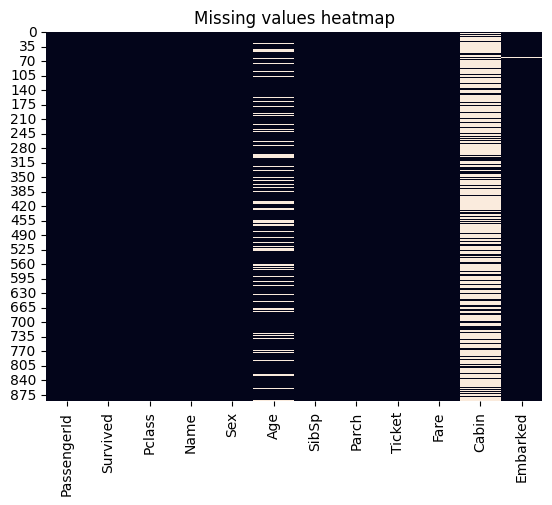

In [6]:
sns.heatmap(train.isnull(), cbar = False).set_title("Missing values heatmap")

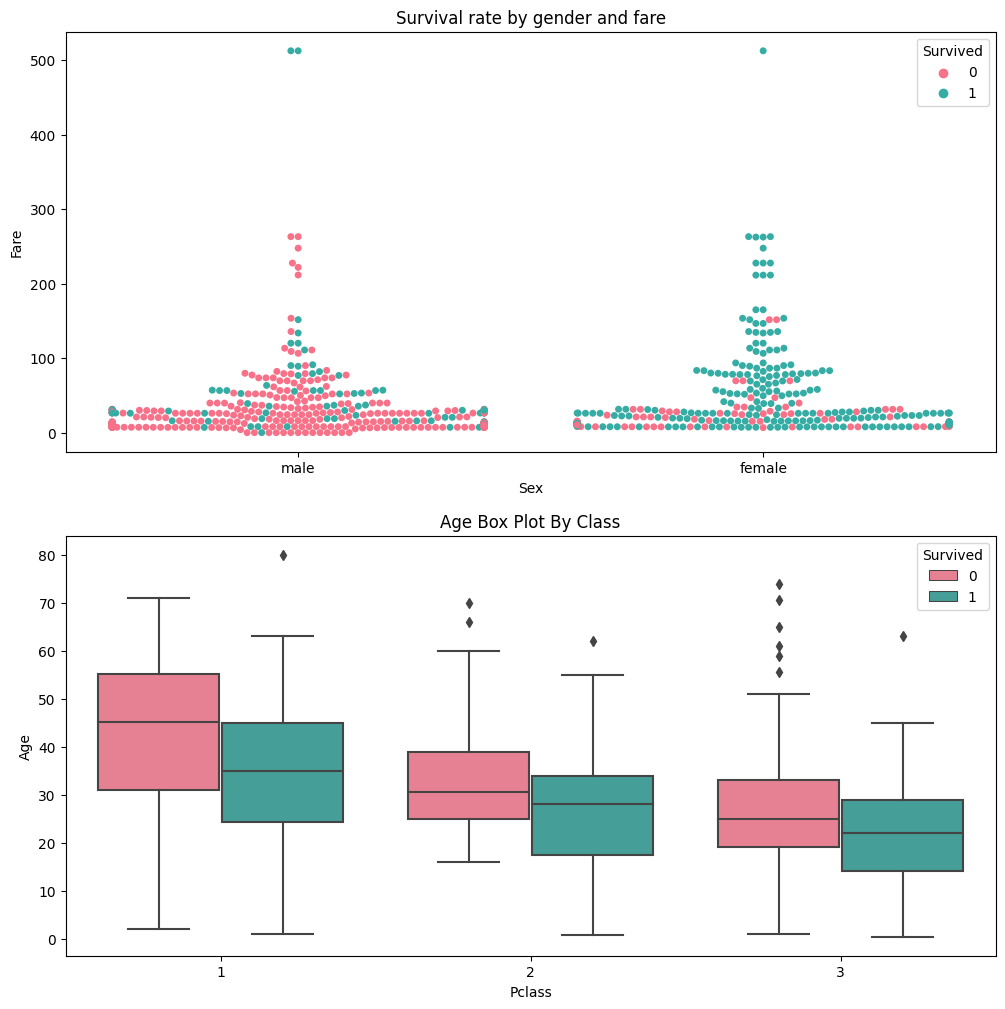

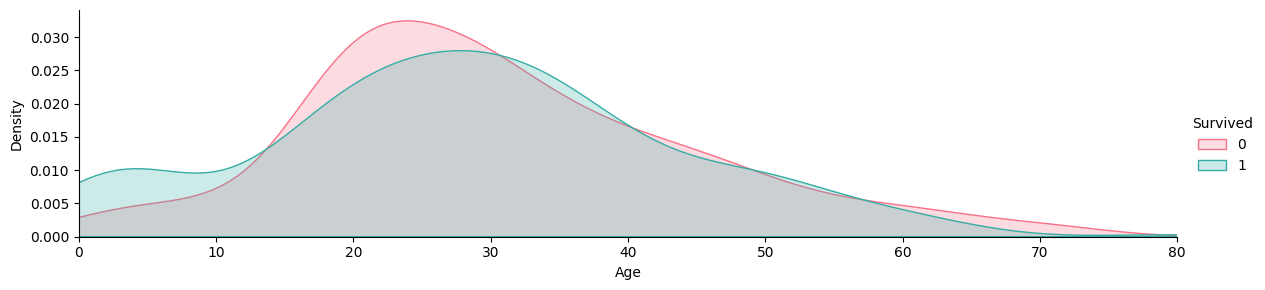

In [7]:

f, ax = plt.subplots(2, figsize=(12, 12))

sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train, ax=ax[1], palette='husl')
ax[1].set_title('Age Box Plot By Class')

sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=train, ax=ax[0], palette='husl')
ax[0].set_title('Survival rate by gender and fare')


facet = sns.FacetGrid(train,hue='Survived', aspect=4, palette='husl')
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()  # Assigning the facet to the second row of the existing figure

facet.set_axis_labels('Age', 'Density')  # Set axis labels
plt.show()



From this visualizations we can see:
 * The younger you are the more likely you will survive
 * females usually survive
 

Let's expolore classes and fairs more

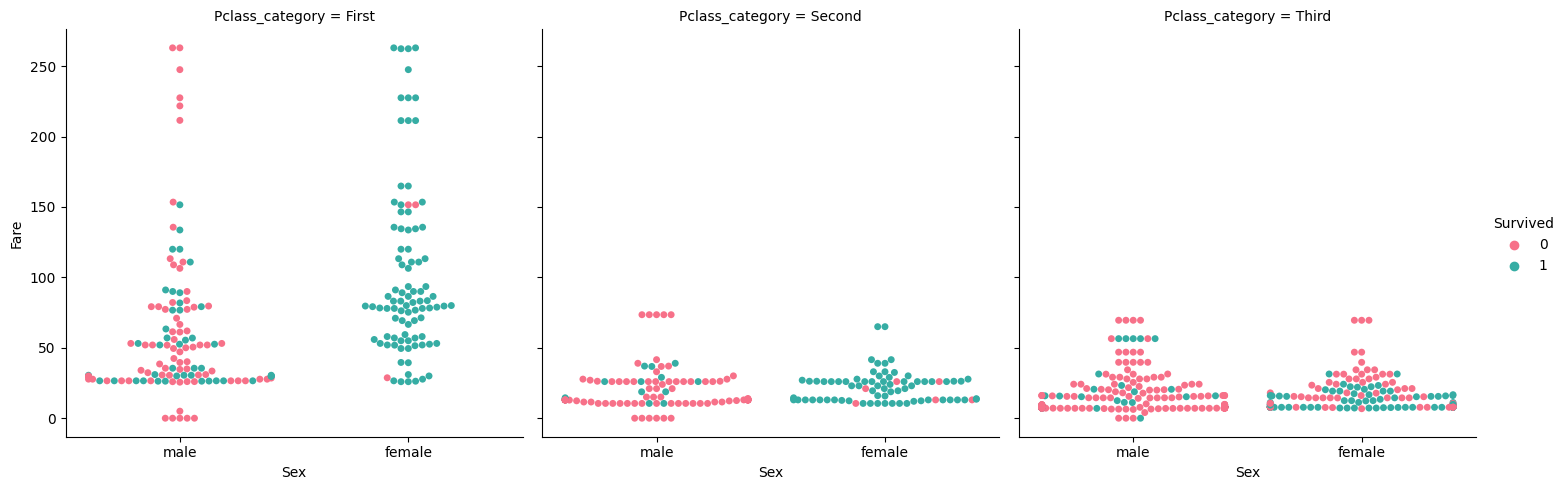

In [8]:
bins_class = [0,1,2,3]
labels_class = ['First','Second','Third']
train['Pclass_category']=pd.cut(train['Pclass'],bins=bins_class, labels=labels_class)

bins_fare= [0,10,40,60,100,199,600]
labels_fare = ['~10','~40','~60','~100','~200','~600']
train['Fare_category']=pd.cut(train['Fare'],bins=bins_fare, labels=labels_fare)
Fare_wo_outliers=train[train['Fare']<500]
sns.catplot( y='Fare', x='Sex',  hue='Survived', data=Fare_wo_outliers, col='Pclass_category', kind="swarm", palette='husl')

* Usually females are saved,excpect they are in the third class

In [9]:
total = train.isnull().sum().sort_values(ascending = False) # finding the N/A values and summing them up
print(total)

Cabin              687
Age                177
Fare_category       15
Embarked             2
PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Pclass_category      0
dtype: int64


In [10]:
percent_1 = train.isnull().sum() / train.shape[0] * 100
percent_1_sorted = percent_1.sort_values(ascending=False)
print(percent_1_sorted.apply(lambda x: "{:.2f}%".format(x)))


Cabin              77.10%
Age                19.87%
Fare_category       1.68%
Embarked            0.22%
PassengerId         0.00%
Survived            0.00%
Pclass              0.00%
Name                0.00%
Sex                 0.00%
SibSp               0.00%
Parch               0.00%
Ticket              0.00%
Fare                0.00%
Pclass_category     0.00%
dtype: object


# 2.Data manipulation

## 2.1 Data Imputation

In [11]:
print(train.Embarked.mode())

0    S
Name: Embarked, dtype: object


In [12]:
# Embarked (2 missing values)
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True) # filles in the empty values in the embarked with the mode value in the set,
                                                                # the 'inplace' flag indicates if the function returns a new value(if false), or makes changes in the same dataframe)
                                                                # the [0] is specified as there might be several mode values
        
median_age = train['Age'].median()
train['Age'].fillna(median_age, inplace=True)


In [13]:
total = train.isnull().sum().sort_values(ascending = False) # finding the N/A values and summing them up(TRUE as 1)
print(total)

Cabin              687
Fare_category       15
PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
Pclass_category      0
dtype: int64


Text(0.5, 1.0, 'Missing values heatmap')

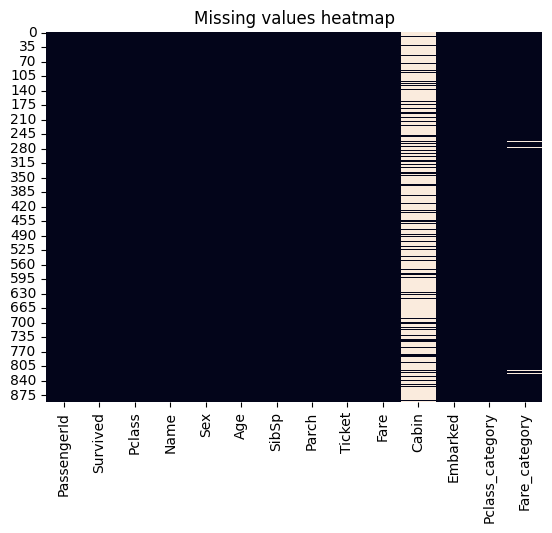

In [14]:
sns.heatmap(train.isnull(), cbar = False).set_title("Missing values heatmap")

In [15]:
train['Cabin'].value_counts(ascending=False)

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [16]:
# I think the cabin data is useless in this way,
# but I figured that maybe the numbers in the beggining indicate some correlation or at least meaningul information
# so I am going to cut them and put them in the new column
train['New_Cabin'] = train['Cabin'].str[0]

In [17]:
train['New_Cabin'].value_counts(ascending=False)

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: New_Cabin, dtype: int64

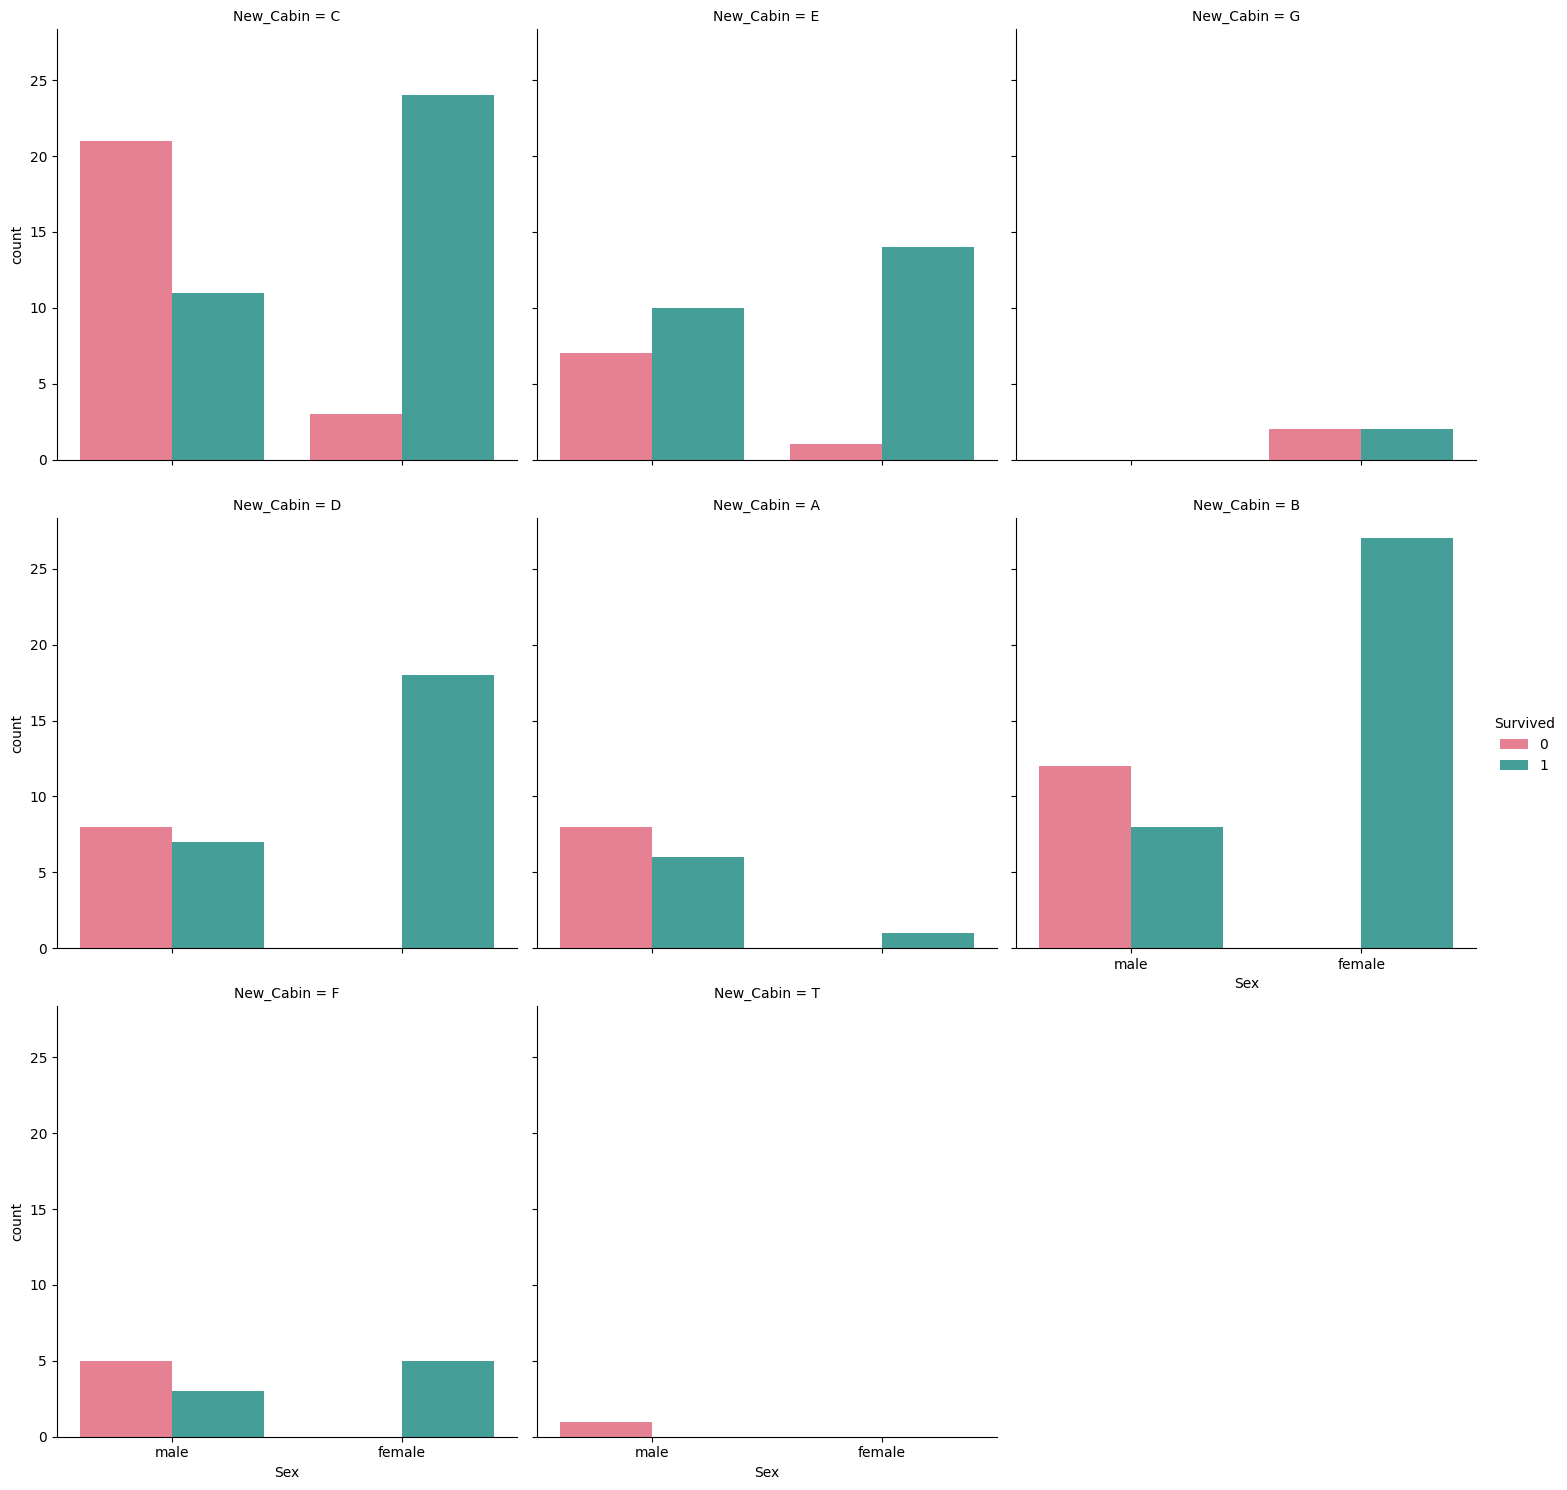

In [18]:
# let's see if it's helpful

sns.catplot(x='Sex', hue='Survived', data=train, kind="count", col='New_Cabin', palette='husl',col_wrap=3)

Not really, let's tackle the age.

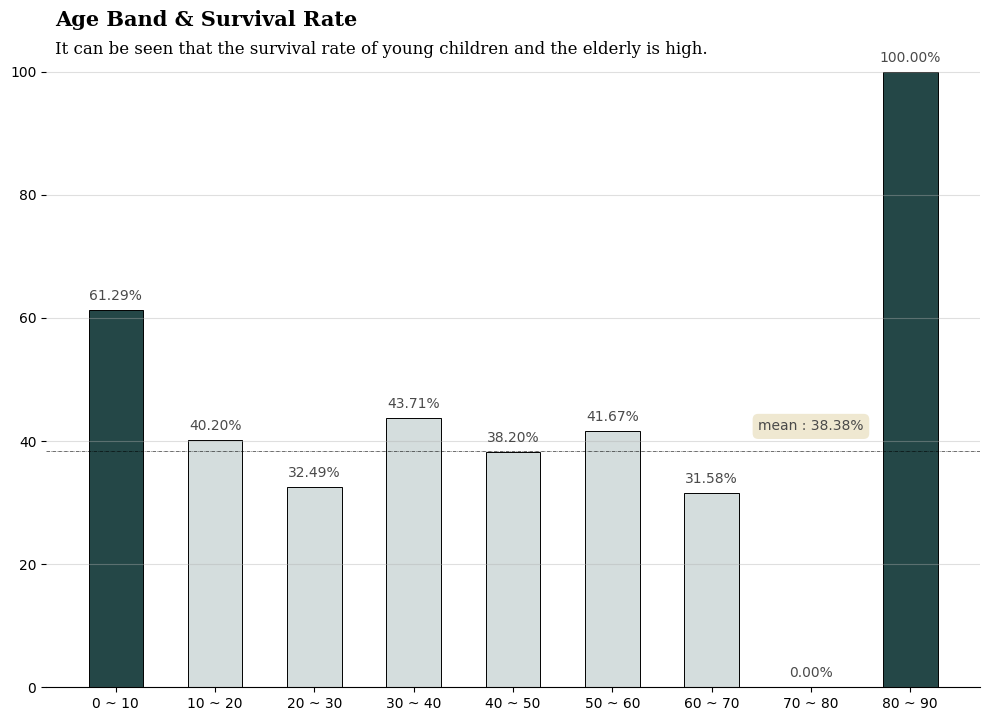

In [19]:
 
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

train['age_band'] = train['Age'].apply(age_band)
titanic_age = train[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

# Generate color palette
colors =  ['#d4dddd' for _ in range(9)]
colors[0] = colors[8] = '#244747'
#I usually put huls but in this case the author of this graph used the same color for the first and last bar and it's helpful


ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=colors, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va='center', ha='center', fontweight='light', 
                   color='#4a4a4a')

# mean line + annotation
mean = train['Survived'].mean() * 100
ax.axhline(mean, color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean:.4}%", 
            xy=('70 ~ 80', mean + 4),
            va='center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

# Title & Subtitle    
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Missing values heatmap')

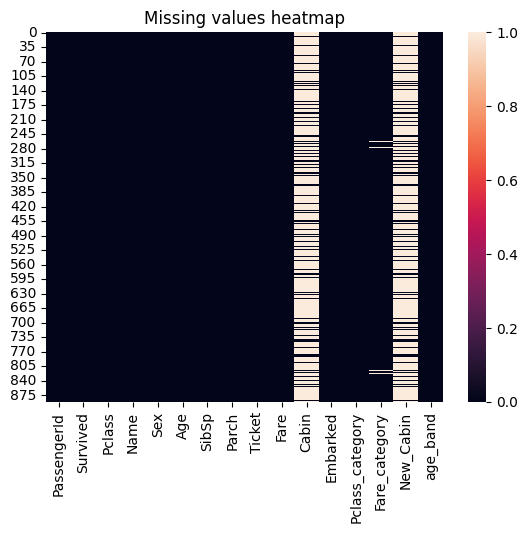

In [21]:
sns.heatmap(train.isnull()).set_title("Missing values heatmap")